# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Para este problema, pienso que serán fundamentales variables como la zona, barrio donde se encuentra la propiedad, ya que se sabe que el valor del m2 cambia según la ubicación de las propiedades. Despues otros datos importantes serán la superficie total/cubierta y los ambientes/habitaciones que tenga. Esos son de los principales atributos por los cuales se termina tasando el valor de una propiedad.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
### CARGO EL DATASET
data=pd.read_csv('C:/Users/ncarello/Desktop/Datasets/properati_data.csv',sep=',') 

# MUESTRO LAS PRIMERAS 5 FILAS
data.head() 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
# MUESTRO CANTIDAD DE FILAS Y COLUMNAS

print('Cantidad de filas =',data.shape[0])
print('Cantidad de columnas =',data.shape[1])

Cantidad de filas = 146660
Cantidad de columnas = 19


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
# NNOMBRE DE LAS COLUMNAS

print(data.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [5]:
## CAMBIO DE NOMBRE LAS COLUMNAS L1, L2 y L3

data.rename(columns={'l1': 'pais', 'l2': 'zona','l3':'barrio'},inplace=True)

In [6]:
# DATOS FALTANTES POR CADA COLUMNA

print(data.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
pais                   0
zona                   0
barrio                 0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Text(0, 0.5, 'Cantidad')

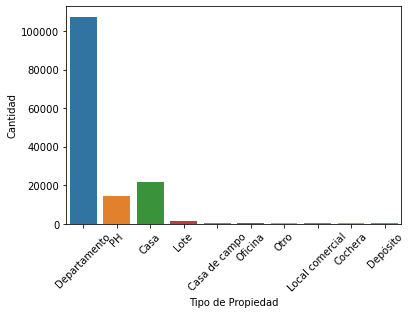

In [7]:
# PRINTEO LA CANTIDAD DE TIPOS DE PROPIEDADES PUBLICADOS Y LUEGO GRAFICO

print(data.property_type.value_counts())

sns.countplot(x=data.property_type)
plt.xticks(rotation = 45)
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')

## En este gráfico podemos observar que las propiedades con mas muestras son las de tipo viviendas (Departamento, PH y Casa). Lo cual puede decirnos que podemos llegar a prescindir de las demás muestras ya que son insignificantes, comparando con las 3 mas predominantes.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Text(0.5, 0, 'Cantidad de Publicaciones')

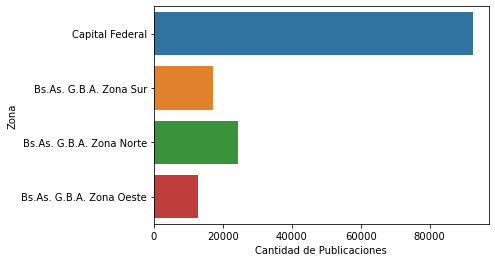

In [8]:
sns.countplot(y=data.zona)

plt.ylabel('Zona')
plt.xlabel('Cantidad de Publicaciones')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

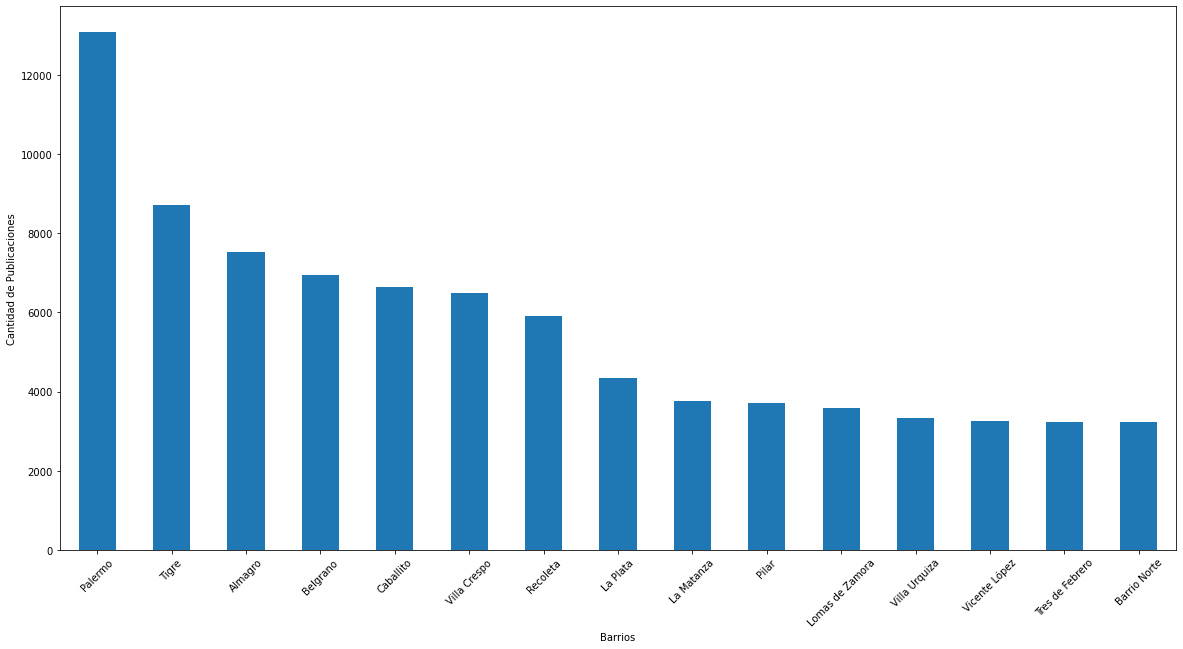

In [9]:
# GRAFICO LA CANTIDAD DE PUBLICACIONES POR BARRIO HACIENDO UN TOP 15 PARA QUE EL GRAFICO SEA MAS LEGIBLE

data['barrio'].value_counts().nlargest(15).plot(kind='bar', figsize=(20, 10))

plt.xlabel('Barrios')
plt.ylabel('Cantidad de Publicaciones')
plt.xticks(rotation = 45)


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [10]:
# SELECCIONO EL TOP 3 DE CANTIDAD DE PROPIEDADES

data.property_type.value_counts().nlargest(3)

# SELECCIONO EL TOP 1 DE PUBLICACIONES x ZONA

data.zona.value_counts().nlargest(1)


Capital Federal    92539
Name: zona, dtype: int64

In [11]:
# CREO EL NUEVO DATASET FILTRADO

data2 = data[(data['property_type'].str.contains('Departamento')|data['property_type'].str.contains('Casa')|data['property_type'].str.contains('PH')) & (data.zona=='Capital Federal')]

data2.shape

(91486, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [12]:
# PRIMERA VISTA DE LAS VARIABLES
data2.describe()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86952.000000,86938.000000,91486.000000,91486.000000,89315.000000,82569.000000,82251.000000,9.148600e+04
mean,-34.599082,-58.436002,2.964290,1.960278,1.560141,112.683913,94.967587,2.594989e+05
std,0.023957,0.036296,1.314701,1.072940,0.860306,980.847112,778.510596,3.222639e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599448,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


C:\Users\ncarello\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


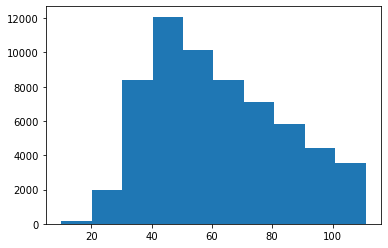

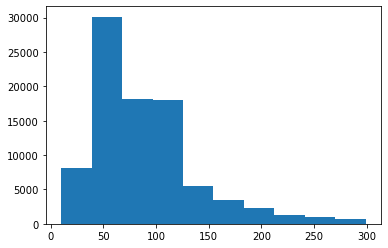

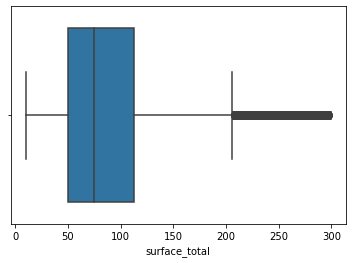

In [13]:
# ESTUDIO surface_total

#VEO CUANTOS VALORES SON NaN
data2.surface_total.isna().sum()

#LOS LLENO CON EL VALOR PROMEDIO

data2.surface_total.fillna(data2.surface_total.mean(),inplace=True)

# GRAFICO PARA VER PROPIEDADES +- PROMEDIO Y AGARRO UN VALOR NO TAN GRANDE PARA PODER VISUALIZAR MEJOR CON EL BOXPLOT Y SEGUIR TENIENDO UNA MUESTRA IMPORTANTE
data3=data2[data2.surface_total<112] 
plt.hist(data3['surface_total'])
plt.show()

data3=data2[data2.surface_total<300] 
plt.hist(data3['surface_total'])
plt.show()

sns.boxplot(x=data3.surface_total)

#ELIMINO LAS INSTANCIAS DONDE LA SUP CUBIERTA ES MAYOR A LA TOTAL

data4=data3[data3.surface_covered<=data3.surface_total] 


## Con estos gráficos podemos ver el 50% de las propiedades de las muestras tomadas rondan entre los 50 y 120 (aprox) metros cuadrados.
## Despues la mediana es de 88 m2

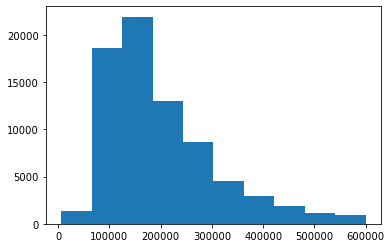

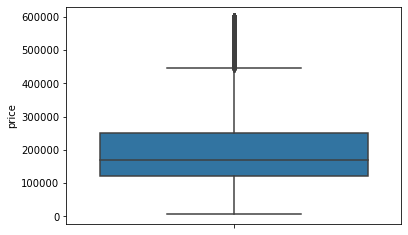

In [14]:
# ESTUDIO VARIABLE PRECIO

#VEO CUANTOS VALORES SON NaN
data4.price.isna().sum()

# AGARRO UN VALOR QUE ME PERMITA VISUALIZAR MEJOR LA VARIABLE
df=data4[data4.price<600000]
plt.hist(df['price'])
plt.show()

sns.boxplot(y=df.price)
plt.show()

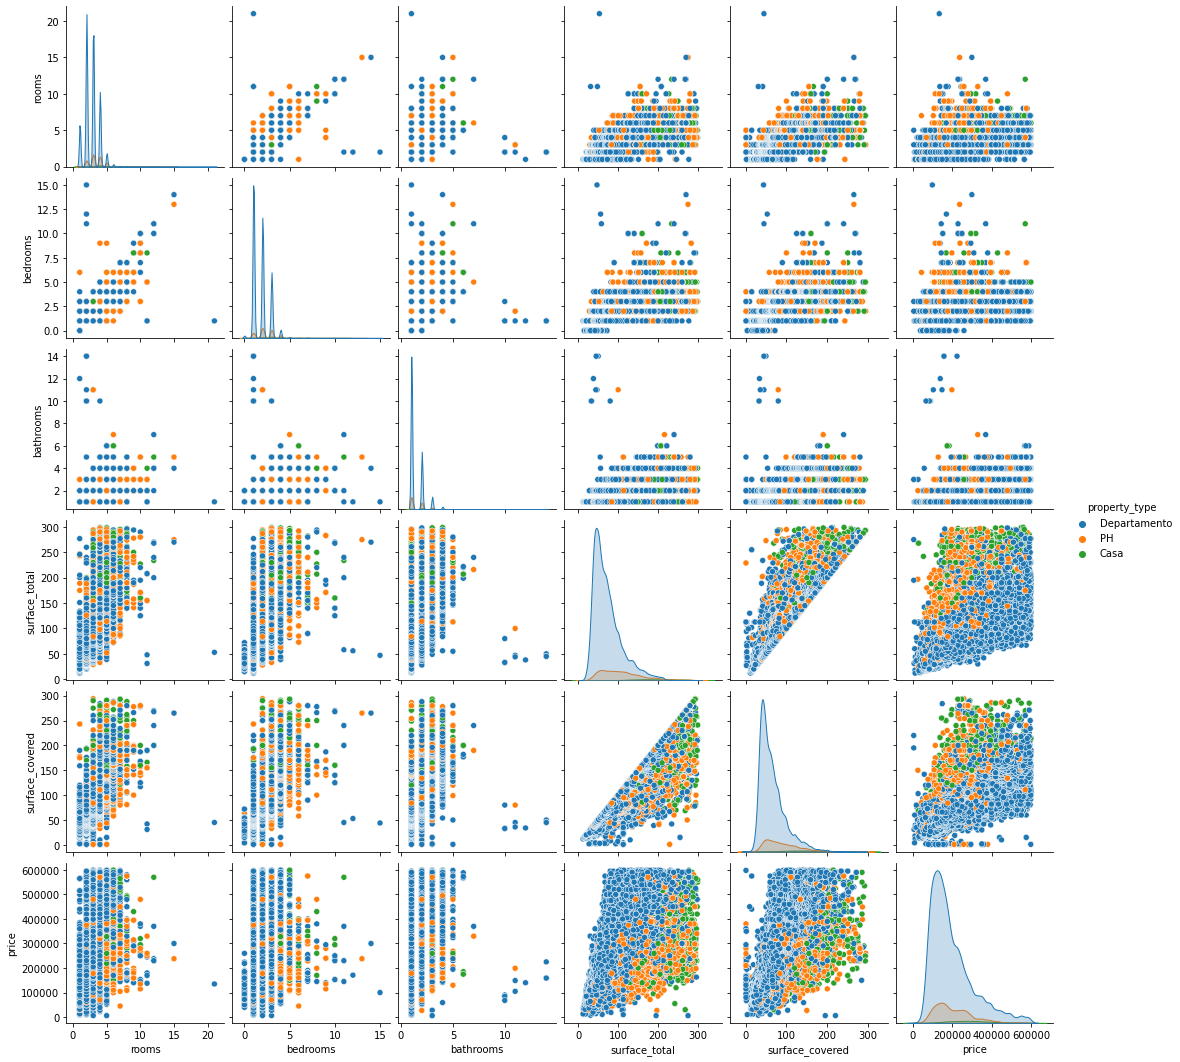

In [15]:
#PAIRPLOT

sns.pairplot(df.drop(columns = ['lat','lon']),hue='property_type')



En términos generales los precios más altos y más variables son aquellos de los departamentos, sin embargo hay publicaciones de casas que pueden ser iguales de caras. Por otro lado, los PH son el tipo de propiedad mas barata.
Otra apreciación que se puede hacer es que, en general, las Casas tienen mayor superficie que los Departamentos, por mas que estas ultimas sean mas caras. Podemos deducir que el precio de m2 de un departamento es mayor que el de una Casa.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

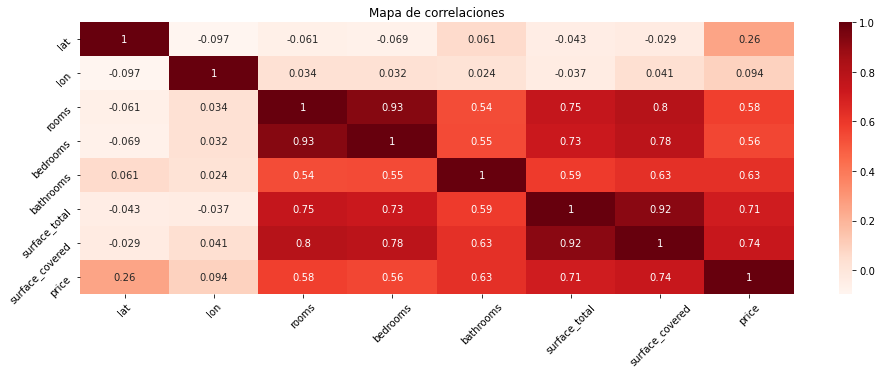

In [16]:
correlacion = df.corr()

plt.figure(figsize = (16,5))
sns.heatmap(correlacion, annot = True, cmap = 'Reds')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Mapa de correlaciones')
plt.show()

### Por lo visto las 2 variables que mas nos ayudarán a percibir el precio son la superficie total y cubierta. Sacando lo que es superficie, la cantidad de baños es la principal variable que se correlaciona con el precio.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

Cual es la zona mas cara fuera de Capital Federal?

Text(0.5, 0, 'Precio (USD)')

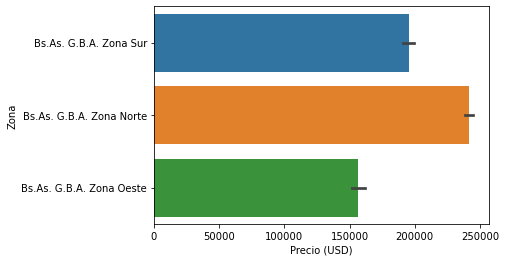

In [17]:
data_zona = data[data['zona'].str.contains('Bs.As. G.B.A. Zona Sur')|data['zona'].str.contains('Bs.As. G.B.A. Zona Norte')|data['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')]

sns.barplot(data=data_zona,y=data_zona.zona,x=data_zona.price)
plt.ylabel('Zona')
plt.xlabel('Precio (USD)')


## Como muestra el gráfico, el precio promedio de las viviendas de Zona Norte son superiores a las de Zona Sur y Oeste.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.


## Realizo un filtro final para poder empezar a construir el modelo de Machine Learning

In [18]:
# FILTRO EL DATASET CON LO INDICADO

df_final = data.drop(columns=['lat','lon','title','description','start_date','end_date','created_on'])

df_final = df_final.rename(columns={'l1': 'pais', 'l2': 'zona','l3':'barrio'})

df_final = df_final[df_final.zona.str.contains('Capital Federal')]

df_final = df_final[df_final.property_type.str.contains('Departamento')|df_final.property_type.str.contains('PH')|df_final.property_type.str.contains('Casa')]

df_final = df_final[df_final.zona.str.contains('Capital Federal')]

df_final = df_final[df_final.surface_total < 1000]

df_final = df_final[df_final.surface_total > 15]

df_final = df_final = df_final[df_final.price < 4000000]

df_final = df_final.dropna()

df_final = df_final[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

df_final


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


# METRICA

## Para realizar el análisis y medir la performance de los modelos, voy a usar RMSE ya que es considerada una de las métricas más robustas para trabajar con regresión. A diferencia de otras métricas el RMSE es más útil cuando los errores grandes son particularmente indeseables. Como en este caso particular la variable a predecir es el precio de una propiedad, hay que evitar predicciones que sean muy distantes del valor promedio.

# BENCHMARK

## Voy a crear un modelo Benchmark de tipo LinearRegression para partir de un modelo base, ver algunos resultados, y de ahí tratar de crear otros modelos mas complejos y poder mejorar los resultados, métricas, RMSE.

In [45]:
df_final.corr()


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,80993.000000,80993.000000,80993.000000,80993.000000,80993.000000,8.099300e+04
mean,3.009334,2.001766,1.553208,95.283000,84.868087,2.631648e+05
std,1.307946,1.049253,0.851032,76.924209,156.068162,2.951556e+05
min,1.000000,0.000000,1.000000,16.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,995.000000,17220.000000,3.900000e+06


In [20]:
# AGARRO LAS 2 COLUMNAS CON MAS CORRELACION CON EL PRECIO

X = df_final.drop('price',axis=1)
y = df_final.price

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=42)

In [23]:
lr = LinearRegression()

In [43]:
lr.fit(X,y)
y_train_pred = lr.predict(X_train) 
y_test_pred = lr.predict(X_test) 
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print('Raíz del error cuadrático medio en Train:',rmse_train)
print('Raíz del error cuadrático medio en Test:',rmse_test)
bmv_rmse_train=rmse_train
bmv_rmse_test=rmse_test 

Raíz del error cuadrático medio en Train: 197217.19022377452
Raíz del error cuadrático medio en Test: 197435.93884197072


## Ya con nuestros primeros resultados, vamos a poder comparar estos numeros con los de los siguientes modelos. La intención es crear un modelo que nos dé mejores resultados

# KNN 

### Antes de entrenar a nuestro modelo definitivo, podríamos preguntarnos cuál es el valor ideal de K. Para eso, podemos iterar y ver cuándo tenemos un error bajo con un "buen" valor de K. En este caso usando RMSE:

In [44]:
lista_rmse = []

for K in range(20):
  K = K + 1 # para no usar un K de 0 y llegar a 19
  knn = KNeighborsRegressor(n_neighbors = K)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error = sqrt(mean_squared_error(y_test, y_pred))
  lista_rmse.append(error)
  print("El valor de RMSE para k =", K, "es: ", error)

El valor de RMSE para k = 1 es:  153873.965161395
El valor de RMSE para k = 2 es:  152882.74557174087
El valor de RMSE para k = 3 es:  148669.20451060735
El valor de RMSE para k = 4 es:  149147.1432690332
El valor de RMSE para k = 5 es:  149828.0018583935
El valor de RMSE para k = 6 es:  149834.12011718677
El valor de RMSE para k = 7 es:  150639.64165311144
El valor de RMSE para k = 8 es:  151422.54748727405
El valor de RMSE para k = 9 es:  152442.56461995313
El valor de RMSE para k = 10 es:  154139.5680277618
El valor de RMSE para k = 11 es:  154755.54371214582
El valor de RMSE para k = 12 es:  156189.7913282961
El valor de RMSE para k = 13 es:  156705.61699818424
El valor de RMSE para k = 14 es:  157720.21130383483
El valor de RMSE para k = 15 es:  159021.36063968568
El valor de RMSE para k = 16 es:  159500.58201745572
El valor de RMSE para k = 17 es:  160296.2692849564
El valor de RMSE para k = 18 es:  161132.7615925015
El valor de RMSE para k = 19 es:  162156.53671125593
El valor d

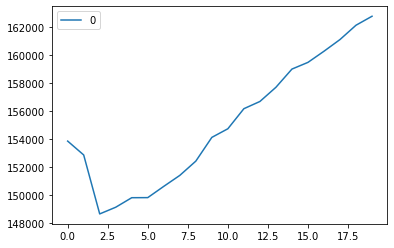

In [27]:
curva = pd.DataFrame(lista_rmse)
curva.plot()

In [28]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [29]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:
# Error en entrenamiento:

train_pred = knn.predict(X_train)
rmse_train = sqrt(mean_squared_error(y_train, train_pred))
rmse_train

107340.2695243833

In [31]:
# Error en testeo (más realista):

y_pred = knn.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred))

rmse_test

148669.20451060735

In [32]:
# CALCULO EL SCORE DE MI MODELO

knn.score(X_test,y_test)

0.7433306010048503

In [33]:
print("Error cuadrático medio del modelo KNN:", sqrt(mean_squared_error(y_test,y_pred)))

Error cuadrático medio del modelo KNN: 148669.20451060735


# ARBOL DE DECISION

In [34]:
from sklearn.tree import DecisionTreeRegressor

## Primero hago una prueba para ver con que valor del hiperparametro 'depth' tiene el menor error.

In [35]:
lista_rmse = []

for depth in range(20):
  depth = depth + 1 # para no usar un K de 0 y llegar a 19
  tree = DecisionTreeRegressor(max_depth = depth)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  error = sqrt(mean_squared_error(y_test, y_pred))
  lista_rmse.append(error)
  print("El valor de RMSE para la profundidad =", depth, "es: ", error)

El valor de RMSE para la profundidad = 1 es:  229260.66142305944
El valor de RMSE para la profundidad = 2 es:  202989.43240627096
El valor de RMSE para la profundidad = 3 es:  188362.68129212075
El valor de RMSE para la profundidad = 4 es:  177937.43439589848
El valor de RMSE para la profundidad = 5 es:  165530.94559504662
El valor de RMSE para la profundidad = 6 es:  160459.97740740742
El valor de RMSE para la profundidad = 7 es:  156660.0575388605
El valor de RMSE para la profundidad = 8 es:  152289.02195493956
El valor de RMSE para la profundidad = 9 es:  150267.50970392453
El valor de RMSE para la profundidad = 10 es:  144293.16088377737
El valor de RMSE para la profundidad = 11 es:  143761.0590872463
El valor de RMSE para la profundidad = 12 es:  141576.74858641252
El valor de RMSE para la profundidad = 13 es:  142549.44772913732
El valor de RMSE para la profundidad = 14 es:  139050.061364113
El valor de RMSE para la profundidad = 15 es:  142788.62185837794
El valor de RMSE para l

## Armo el modelo con la profundidad que me parecio mas conveniente

In [36]:
tree = DecisionTreeRegressor(max_depth = 14)

## Entreno el modelo

In [37]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14)

## Predigo los valores con los registros de train y test

In [38]:
# Error en entrenamiento:

train_pred = tree.predict(X_train)
rmse_train = sqrt(mean_squared_error(y_train, train_pred))

rmse_train

85592.89022616185

In [39]:
# Error en testeo :

y_pred = tree.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred))

rmse_test

138616.30980526982

In [40]:
print("Error cuadrático medio del modelo árbol:", sqrt(mean_squared_error(y_test,y_pred)))

Error cuadrático medio del modelo árbol: 138616.30980526982


In [41]:
tree.score(X_test,y_test)

0.7768685824747097

## Realizo un Grafico comparativo entre los dos modelos creados

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 85592.89022616185
Raíz del error cuadrático medio en Test: 138616.30980526982


C:\Users\ncarello\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ncarello\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


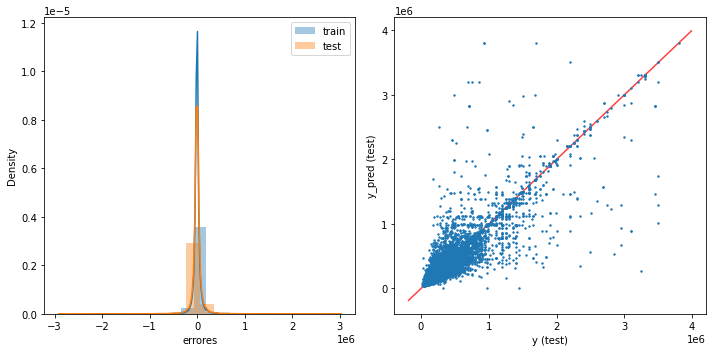

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 107340.2695243833
Raíz del error cuadrático medio en Test: 148669.20451060735


C:\Users\ncarello\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ncarello\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


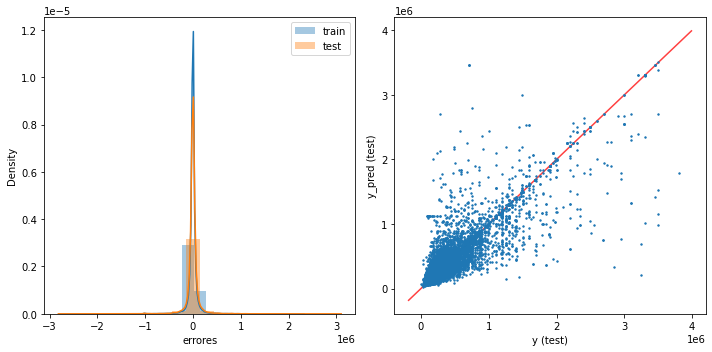

In [42]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree, knn]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print('Raíz del error cuadrático medio en Train:', rmse_train)
    print('Raíz del error cuadrático medio en Test:', rmse_test)
    
    plt.figure(figsize = (10,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,c='r')
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# CONCLUCION

### Como conclusión podemos observar que el ser el precio promedio de una propiedad de 263.000 USD aproximadamente y su error aproximado de 138.000 USD. Por lo tanto, en nuestra predicción podemos acertar en el precio en casi un 50% más o menos del precio real. En el caso de tener que elegir entre vecinos más cercanos o árbol de decisión, el segundo es el que elegiría ya que es más preciso y tiene menor error que el anterior. 